In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy import interpolate

plt.ion()
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 15, weight='bold')

# Analysis of the measurements made at 45 and 55 K for Vdw vs. J with fixed field H.

Dates of the measurements: 12, 15 and 25 january.

I charge the data...

In [2]:
Vj_45K_H0, VdwL_45K_H0, err_VdwL_45K_H0, VdwR_45K_H0, err_VdwR_45K_H0, VdwJ_45K_H0, err_VdwJ_45K_H0 = np.loadtxt('./GaMnAs_T45K_VdwvsVj_H0.dat', unpack=True)
Vj_45K_Vh100V, VdwJ_45K_Vh100V, err_VdwJ_45K_Vh100V, VdwH_45K_Vh100V, err_VdwH_45K_Vh100V = np.loadtxt('./GaMnAs_T45K_VdwJandVdwHvsVj_Vh100V.dat', unpack=True)
Vj_55K_H0, VdwL_55K_H0, err_VdwL_55K_H0, VdwR_55K_H0, err_VdwR_55K_H0, VdwJ_55K_H0, err_VdwJ_55K_H0 = np.loadtxt('./GaMnAs_T55K_VdwvsVj_H0.dat', unpack=True)
Vj_55K_Vh120V, VdwJ_55K_Vh120V, err_VdwJ_55K_Vh120V, VdwH_55K_Vh120V, err_VdwH_55K_Vh120V = np.loadtxt('./GaMnAs_T55K_VdwJandVdwHvsVj_Vh120V.dat', unpack=True)

In [3]:
VdwH_45K_Vh100V_J0, err_VdwH_45K_Vh100V_J0 = 0.752976098901, 0.0295276791814

In [21]:
J_45K_H0 = Vj_45K_H0/(22140*4e-9*100e-6)*10**-9
J_45K_Vh100V = Vj_45K_Vh100V/(22140*4e-9*100e-6)*10**-9
J_55K_H0 = Vj_55K_H0/(22140*4e-9*100e-6)*10**-9
J_55K_Vh120V = Vj_55K_Vh120V/(22140*4e-9*100e-6)*10**-9

* First, I plot the results with no applied field...

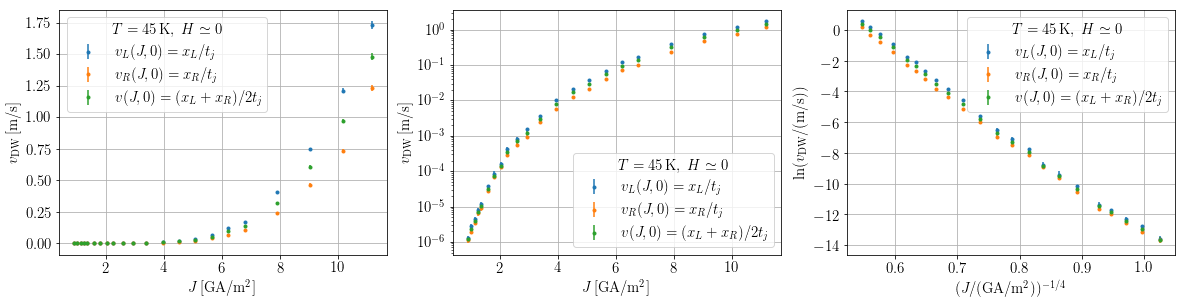

In [23]:
fig, (g1, g2, g3) = plt.subplots(ncols=3, nrows=1, figsize = (20, 4.5))

g1.errorbar(J_45K_H0, VdwL_45K_H0, yerr=err_VdwL_45K_H0, fmt='.', label=r'$ v_L(J,0) = x_L/t_j $')
g1.errorbar(J_45K_H0, VdwR_45K_H0, yerr=err_VdwR_45K_H0, fmt='.', label=r'$ v_R(J,0) = x_R/t_j $')
g1.errorbar(J_45K_H0, VdwJ_45K_H0, yerr=err_VdwJ_45K_H0, fmt='.', label=r'$ v(J,0) = (x_L+x_R)/2t_j $')
g1.grid()
g1.set_xlabel(r'$ J\,[\mathrm{GA/m^{2}}] $')
g1.set_ylabel(r'$ v_{\mathrm{DW}}\,[\mathrm{m/s}] $')
g1.legend(title=r'$ T=45\,\mathrm{K},\;H \simeq 0 $')

g2.errorbar(J_45K_H0, VdwL_45K_H0, yerr=err_VdwL_45K_H0, fmt='.', label=r'$ v_L(J,0) = x_L/t_j $')
g2.errorbar(J_45K_H0, VdwR_45K_H0, yerr=err_VdwR_45K_H0, fmt='.', label=r'$ v_R(J,0) = x_R/t_j $')
g2.errorbar(J_45K_H0, VdwJ_45K_H0, yerr=err_VdwJ_45K_H0, fmt='.', label=r'$ v(J,0) = (x_L+x_R)/2t_j $')
g2.grid()
g2.set_xlabel(r'$ J\,[\mathrm{GA/m^{2}}] $')
g2.set_ylabel(r'$ v_{\mathrm{DW}}\,[\mathrm{m/s}] $')
g2.legend(title=r'$ T=45\,\mathrm{K},\;H \simeq 0 $')
g2.set_yscale('log')

g3.errorbar(J_45K_H0**(-0.25), np.log(VdwL_45K_H0), yerr=err_VdwL_45K_H0/VdwL_45K_H0, fmt='.', label=r'$ v_L(J,0) = x_L/t_j $')
g3.errorbar(J_45K_H0**(-0.25), np.log(VdwR_45K_H0), yerr=err_VdwR_45K_H0/VdwR_45K_H0, fmt='.', label=r'$ v_R(J,0) = x_R/t_j $')
g3.errorbar(J_45K_H0**(-0.25), np.log(VdwJ_45K_H0), yerr=err_VdwJ_45K_H0/VdwJ_45K_H0, fmt='.', label=r'$ v(J,0) = (x_L+x_R)/2t_j $')
g3.grid()
g3.set_xlabel(r'$ (J/(\mathrm{GA/m^{2}}))^{-1/4} $')
g3.set_ylabel(r'$ \ln (v_{\mathrm{DW}}/(\mathrm{m/s})) $')
g3.legend(title=r'$ T=45\,\mathrm{K},\;H \simeq 0 $')

#fig.tight_layout()
#plt.savefig('', dpi = 150)

In [ ]:
fig, (g1, g2, g3) = plt.subplots(ncols=3, nrows=1, figsize = (20, 4.5))

g1.errorbar(J_55K_H0, VdwL_55K_H0, yerr=err_VdwL_55K_H0, fmt='.', label=r'$ v_L(J,0) = x_L/t_j $')
g1.errorbar(J_55K_H0, VdwR_55K_H0, yerr=err_VdwR_55K_H0, fmt='.', label=r'$ v_R(J,0) = x_R/t_j $')
g1.errorbar(J_55K_H0, VdwJ_55K_H0, yerr=err_VdwJ_55K_H0, fmt='.', label=r'$ v(J,0) = (x_L+x_R)/2t_j $')
g1.grid()
g1.set_xlabel(r'$ J\,[\mathrm{GA/m^{2}}] $')
g1.set_ylabel(r'$ v_{\mathrm{DW}}\,[\mathrm{m/s}] $')
g1.legend(title=r'$ T=45\,\mathrm{K},\;H \simeq 0 $')

g2.errorbar(J_45K_H0, VdwL_45K_H0, yerr=err_VdwL_45K_H0, fmt='.', label=r'$ v_L(J,0) = x_L/t_j $')
g2.errorbar(J_45K_H0, VdwR_45K_H0, yerr=err_VdwR_45K_H0, fmt='.', label=r'$ v_R(J,0) = x_R/t_j $')
g2.errorbar(J_45K_H0, VdwJ_45K_H0, yerr=err_VdwJ_45K_H0, fmt='.', label=r'$ v(J,0) = (x_L+x_R)/2t_j $')
g2.grid()
g2.set_xlabel(r'$ J\,[\mathrm{GA/m^{2}}] $')
g2.set_ylabel(r'$ v_{\mathrm{DW}}\,[\mathrm{m/s}] $')
g2.legend(title=r'$ T=45\,\mathrm{K},\;H \simeq 0 $')
g2.set_yscale('log')

g3.errorbar(J_45K_H0**(-0.25), np.log(VdwL_45K_H0), yerr=err_VdwL_45K_H0/VdwL_45K_H0, fmt='.', label=r'$ v_L(J,0) = x_L/t_j $')
g3.errorbar(J_45K_H0**(-0.25), np.log(VdwR_45K_H0), yerr=err_VdwR_45K_H0/VdwR_45K_H0, fmt='.', label=r'$ v_R(J,0) = x_R/t_j $')
g3.errorbar(J_45K_H0**(-0.25), np.log(VdwJ_45K_H0), yerr=err_VdwJ_45K_H0/VdwJ_45K_H0, fmt='.', label=r'$ v(J,0) = (x_L+x_R)/2t_j $')
g3.grid()
g3.set_xlabel(r'$ (J/(\mathrm{GA/m^{2}}))^{-1/4} $')
g3.set_ylabel(r'$ \ln (v_{\mathrm{DW}}/(\mathrm{m/s})) $')
g3.legend(title=r'$ T=45\,\mathrm{K},\;H \simeq 0 $')

#fig.tight_layout()
#plt.savefig('', dpi = 150)